### torch overview and warming-up

overview of Adam optimization schedule:

$$
\begin{equation}
SG_i^t = \frac{SG_i^t}{1 - \gamma^t}
\end{equation}
$$
$$
\begin{equation}
SSG_i^t = \frac{SSG_i^t}{1 - \gamma}
\end{equation}
$$
Once they are defined, the parameter update is expressed as follows:

$$
\begin{equation}
\beta_i^{t+1} = \beta_i^t - \frac{\alpha}{\sqrt{SSG_i^t + \epsilon}} \times SG_i^t
\end{equation}
$$

so Adam optimization involves three hyperparameters – the base
learning rate, and the two decaying rates for the gradients and squared gradients.

the overall difference: *RMSprop*, *Adadelta*, and *Adam* are quite close in terms of their performance on various deep learning
tasks. RMSprop is largely similar to Adadelta, except for the use of the base learning rate in RMSprop
versus the use of the decaying average of previous parameter updates in Adadelta. Adam is slightly
different in that it also includes the first-moment calculation of gradients and accounts for bias correction. Overall, Adam could be the optimizer to go with, all else being equal.

in terms of the difference between torch and tensorflow: *Eager execution* is basically an imperative programming mode where mathematical operations are
computed immediately. A *deferred execution* mode would have all the operations stored in a computational graph without immediate calculations and then the entire graph would be evaluated later.
Eager execution is considered advantageous for reasons such as intuitive flow, easy debugging, and
less scaffolding code.

But what is a tensor? *Tensors*
are computational units, very similar to NumPy arrays, except that they can also be used on GPUs to
accelerate computing. tensors are conceptually similar to NumPy arrays. A tensor is an n-dimensional
array on which we can operate mathematical functions, accelerate computations via GPUs, and *can also keep track of a computational graph and gradients*, which prove vital for deep learning. To run
a tensor on a GPU, all we need is to cast the tensor into a certain data type.

In [2]:
import torch
points = torch.tensor([1.0, 1.1, 1.2, 1.3, 1.4])
dir(points)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '

In PyTorch, tensors are implemented as views over a one-dimensional array of numerical data stored
in contiguous chunks of memory. These arrays are called storage instances. Every PyTorch tensor has
a storage attribute that can be called to output the underlying storage instance for a tensor, as shown
in the following example:

In [3]:
points = torch.tensor([[1.0, 1.1], [1.2, 1.3], [1.4, 1.5]])
points.storage()

/var/folders/my/_m65k3j97z30x5yp5bmzr44h0000gp/T/ipykernel_8421/767904295.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()


 1.0
 1.100000023841858
 1.2000000476837158
 1.2999999523162842
 1.399999976158142
 1.5
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

the tensor uses the following information to implement the view:
- storage
- size
- offset
- stride

In [4]:
# The offset here represents the index of the first element of the tensor in the storage array. Because
# the output is 0, it means that the first element of the tensor is the first element in the storage array.
points.storage_offset()
print(points[1].storage_offset())

2


In [5]:
# stride contains, for each dimension, the number of elements to be skipped in order
# to access the next element of the tensor.
points.stride()

(2, 1)

In [6]:
import math
import torch.nn as nn

weights = torch.randn(256, 4) / math.sqrt(256)
weights.requires_grad_()
bias = torch.zeros(4, requires_grad=True)

# or

# weights = nn.Linear(256, 4)

In [7]:
# very simple neural network with 3 Layer
import torch.optim as optim
import torch.nn.functional as F

loss_func = F.cross_entropy

model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 4)
)

opt = optim.SGD(model.parameters(), lr=0.01)

# with torch.no_grad():
#     for param in model.parameters():
#         param -= param.grad * 0.01
#         model.zero_grad()

opt.step()
opt.zero_grad()

input = torch.randn(128, 2)
target = torch.randn(128, 4)

loss = loss_func(model(input), target)
print(loss)

tensor(-0.4257, grad_fn=<DivBackward1>)


In [8]:
from torch.utils.data import (TensorDataset, DataLoader)
train_dataset = TensorDataset(input, target)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
train_dataloader

In [9]:
for x_batch, y_batch in train_dataloader:
    pred = model(x_batch)
    loss = loss_func(pred, y_batch)
    print('Loss:', loss.item())
    loss.backward()
    opt.step()
    opt.zero_grad()

Loss: -0.8342684507369995
Loss: -1.210632562637329
Loss: -0.13056328892707825
Loss: 0.4806225001811981


#### Training a sample Neural network:

In [10]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

##### Final desired architecture:
<img src=images/Mnist_arch.png>

output size of a conv2d: $$\text{Output size} = \frac{\text{Input size} - \text{Kernel size}}{\text{Stride}} + 1$$

In [12]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 is basically 12 X 12 X 32
        self.fc2 = nn.Linear(64, 10)
 
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op

| Layer                 | Type                   | Output Shape    |
|-----------------------|----------------------|----------------|
| **Input**            | -                    | `(1, 28, 28)`  |
| **Conv1 (`cn1`)**    | `Conv2d(1, 16, 3, 1)` | `(16, 26, 26)` |
| **ReLU**             | Activation           | `(16, 26, 26)` |
| **Conv2 (`cn2`)**    | `Conv2d(16, 32, 3, 1)`| `(32, 24, 24)` |
| **ReLU**             | Activation           | `(32, 24, 24)` |
| **Max Pooling (2x2)**| `F.max_pool2d(x, 2)`  | `(32, 12, 12)` |
| **Dropout1 (`dp1`)** | Dropout (10%)        | `(32, 12, 12)` |
| **Flatten**          | `torch.flatten(x, 1)` | `(4608,)`      |
| **Fully Connected (`fc1`)** | `Linear(4608, 64)` | `(64,)`  |
| **ReLU**             | Activation           | `(64,)`        |
| **Dropout2 (`dp2`)** | Dropout (25%)        | `(64,)`        |
| **Fully Connected (`fc2`)** | `Linear(64, 10)` | `(10,)`  |
| **Log Softmax**      | Activation           | `(10,)`        |

the number of parameters in conv layers are determined by:
$$Parameters = (kernel_{height} \times kernel_{width} \times input_{channels}+1 ) \times output_{channels}$$

In [13]:
model = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1),
    nn.ReLU(),
    nn.Conv2d(16, 32, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout2d(0.10),
    nn.Flatten(),
    nn.Linear(4608, 64),
    nn.ReLU(),
    nn.Dropout2d(0.25),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

What’s the difference between a `Sequential` and a `torch.nn.ModuleList`? A ModuleList is exactly what it sounds like–a list for storing Module s! On the other hand, the layers in a Sequential are connected in a cascading way.

In [14]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)
        # each batch starts with fresh gradients
        optim.zero_grad()
        output_prob = model(data)
        loss = F.nll_loss(output_prob, target)
        loss.backward()
        # Update model parameters using the optimizer
        optim.step()
        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} \
                  [{batch_idx * len(data)}/{len(train_dataloader.dataset)} \
                    ({100. * batch_idx / len(train_dataloader):.0f}%)]\tLoss: {loss.item():.6f}')

In [15]:
def test(model, device, test_dataloader):
    # dropout and batchnorm layers are disabled
    model.eval()
    test_loss = 0
    success = 0
    with torch.no_grad():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)
            pred_prob = model(data)
            test_loss += F.nll_loss(pred_prob, target, reduction='sum').item()
            # getting the highest probability prediction
            pred = pred_prob.argmax(dim=1, keepdim=True)
            # compare predictions to actual target
            success += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_dataloader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {success}/{len(test_dataloader.dataset)} \
          ({100. * success / len(test_dataloader.dataset):.0f}%)')

In [16]:
# The mean and standard deviation values are calculated as the mean of all pixel values of all images in the training dataset
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
    batch_size=32, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,)) 
                   ])),
    batch_size=500, shuffle=False)

```python
transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
```
:
we also normalize the dataset to a normal distribution with a specified mean and
standard deviation. This mean and standard deviation comes from the training dataset if we
are training a model from scratch. However, if we are transfer-learning from a pre-trained
model, then the mean and standard deviation values are obtained from the original training
dataset of the pre-trained model

In [17]:
torch.manual_seed(0)
device = torch.device('cpu')
model = ConvNet()
# Adadelta could be a good choice if we are dealing with sparse data.
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

In [18]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

/Users/lyteatnyte/Dev/github/Algorithms/venv/lib/python3.13/site-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 1                   [0/60000                     (0%)]	Loss: 2.301478
Train Epoch: 1                   [320/60000                     (1%)]	Loss: 1.744151
Train Epoch: 1                   [640/60000                     (1%)]	Loss: 1.234419
Train Epoch: 1                   [960/60000                     (2%)]	Loss: 0.831864
Train Epoch: 1                   [1280/60000                     (2%)]	Loss: 0.969944
Train Epoch: 1                   [1600/60000                     (3%)]	Loss: 0.553209
Train Epoch: 1                   [1920/60000                     (3%)]	Loss: 0.627510
Train Epoch: 1                   [2240/60000                     (4%)]	Loss: 0.576939
Train Epoch: 1                   [2560/60000                     (4%)]	Loss: 0.446714
Train Epoch: 1                   [2880/60000                     (5%)]	Loss: 0.378821
Train Epoch: 1                   [3200/60000                     (5%)]	Loss: 0.337835
Train Epoch: 1                   [3520/60000                

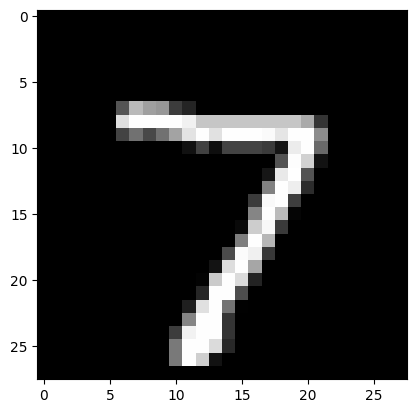

In [19]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
plt.imshow(sample_data[0][0],
    cmap='gray', interpolation='none')

In [20]:
# The forward pass of the neural network done using
# model() produces probabilities. Hence, we use the max() function to output the class with the
# maximum probability.
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 7
Ground truth is : 7


Note that, for predictions, we first calculate the class with maximum probability using the max()
function on axis=1. The max() function outputs two lists – a list of probabilities of classes for
every sample in sample_data and a list of class labels for each sample. Hence, we choose the
second list using index [1].

In [21]:
print(model(sample_data).data.max(1))

torch.return_types.max(
values=tensor([ 0.0000e+00, -5.7220e-06, -8.7022e-06, -1.4305e-05, -4.2915e-06,
        -5.8412e-06, -7.7483e-05, -4.0676e-03, -1.1091e-02, -4.5031e-03,
        -2.3842e-07, -5.0068e-06, -1.4304e-04, -5.9605e-07, -3.9339e-06,
        -1.8482e-03, -2.1934e-05, -3.5763e-07, -9.6553e-03, -7.1526e-07,
        -4.0265e-03, -1.4186e-05, -2.4199e-05, -7.1526e-07, -3.3378e-05,
        -5.0068e-06, -7.3909e-06, -1.1921e-07, -1.7881e-06, -8.4638e-06,
        -9.5367e-07, -8.0696e-04, -3.5763e-07, -1.5491e-02, -5.9604e-06,
        -3.9339e-06, -1.7153e-04, -6.3181e-06, -1.1206e-05, -1.5497e-06,
        -3.2544e-05, -1.6366e-04, -2.8463e-04, -1.7207e-03, -1.8333e-04,
        -1.7285e-05, -1.3714e-03, -7.1526e-07, -3.9219e-05, -3.5763e-07,
        -5.9604e-06, -1.5616e-05, -3.5763e-07, -9.6674e-05, -5.1260e-06,
        -2.3842e-07,  0.0000e+00, -1.1802e-05, -2.7418e-05, -8.1351e-04,
        -2.7418e-06, -5.0543e-05, -8.4364e-02, -1.5560e-03, -2.1458e-06,
        -1.1719e-03,